# 🫀 Heart Disease Prediction Project

Welcome to the heart disease prediction project! In this project, you will work with a structured dataset related to cardiovascular health, where the goal is to predict the presence of heart disease based on various medical and personal attributes.

## 🧠 Project Objectives

1. **Model Development with PyTorch**
   - Build multiple neural network models using **PyTorch**.
   - Experiment with different architectures, activation functions, learning rates, and optimizers.
   - Evaluate model performance using appropriate metrics (accuracy, precision, recall, F1-score, etc.).
   - Analyze which approaches give the best results.
   - Emphasize **experimentation and model iteration** throughout the process.

2. **Neural Network from Scratch**
   - Without using PyTorch, TensorFlow, Keras, or any other deep learning library, implement a **Multilayer Perceptron (MLP)** from scratch using only **NumPy**.
   - Architecture specification:
     - Input Layer: Depends on the dataset features.
     - **Hidden Layer 1**: 6 units
     - **Hidden Layer 2**: 4 units
     - Output Layer: 1 unit (binary classification)
   - Implement forward pass, activation functions (e.g., sigmoid, ReLU), and backpropagation manually.
   - Train your model using gradient descent and visualize loss during training.

## 🔍 Dataset

You will use the **Heart Disease UCI dataset**, which includes features such as age, sex, chest pain type, resting blood pressure, cholesterol level, fasting blood sugar, maximum heart rate, and more.

Dataset link (if applicable): [UCI Heart Disease Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

## 📌 Key Skills You Will Practice

- Deep learning model design and experimentation
- Implementation of neural networks from scratch
- Model evaluation and performance tuning
- PyTorch fundamentals
- Backpropagation and gradient descent mechanics
- Scientific communication via well-documented notebooks

---

Good luck, and remember: **understanding the core logic behind neural networks is just as important as using frameworks.**


In [1]:
# 1. Datani yuklediz
# 2. Scale etdiz
# 3. Train Test e Bolun
# 4. Random forest model
# 5. Logistic model qurun
# 6. XGBoost
# 7. Pytorch la model qurun
# 8. her bir model ucun score lari teyin edin yigin dataframe e(F1, accuracy, precision, recall)
# 9. Deep learning Loss eyrileri ni cekin
# 10. DEEP LEARNING FROM SCRATCH

In [1]:
import numpy as np, seaborn as sns, pandas as pd, matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
sc_df = scaler.fit_transform(df)
sc_df = pd.DataFrame(sc_df)
sc_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,-1.026698
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,-1.026698
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,-1.026698
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,-1.026698
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,-1.026698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.661504,0.055931,0.479107,-0.484803,-0.418878,0.891255,0.647366,1.403928,-0.912329,0.995433,-0.731971,-0.522122,0.973997
1021,0.613800,0.661504,-0.915755,-0.377636,0.232705,-0.418878,-1.004049,-0.352873,1.403928,1.471705,-0.624121,0.238625,1.089852,-1.026698
1022,-0.819834,0.661504,-0.915755,-1.234378,0.562371,-0.418878,-1.004049,-1.353113,1.403928,-0.060888,-0.624121,0.238625,-0.522122,-1.026698
1023,-0.488996,-1.511706,-0.915755,-1.234378,0.155137,-0.418878,-1.004049,0.429923,-0.712287,-0.912329,0.995433,-0.731971,-0.522122,0.973997


In [7]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [9]:
X = df.drop('target', axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [10]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rand_for = RandomForestClassifier()
rand_for.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
prd1 = rand_for.predict(X_test)

In [14]:
accuracy_score(prd1, y_test)

0.9853658536585366

In [15]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [16]:
prd2 = log_reg.predict(X_test)

In [17]:
accuracy_score(prd2, y_test)

0.7853658536585366

In [18]:
from xgboost import XGBClassifier

In [19]:
xg = XGBClassifier()
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [20]:
prd3 = xg.predict(X_test)

In [21]:
accuracy_score(prd3, y_test)

0.9853658536585366

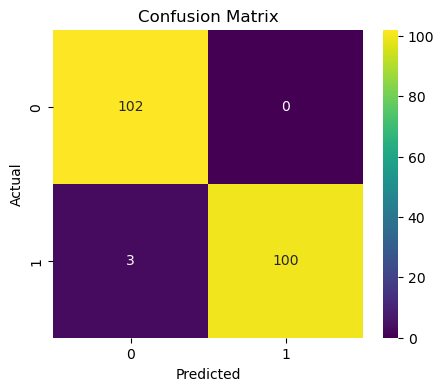

In [22]:
cm = confusion_matrix(y_test, prd1)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

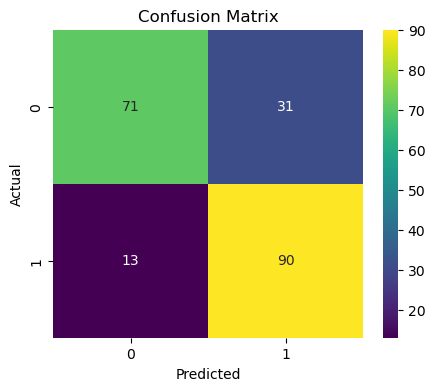

In [23]:
cm = confusion_matrix(y_test, prd2)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

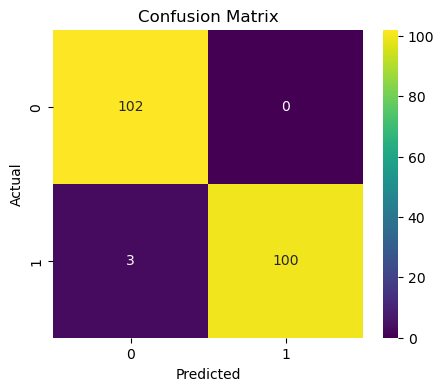

In [24]:
cm = confusion_matrix(y_test, prd3)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

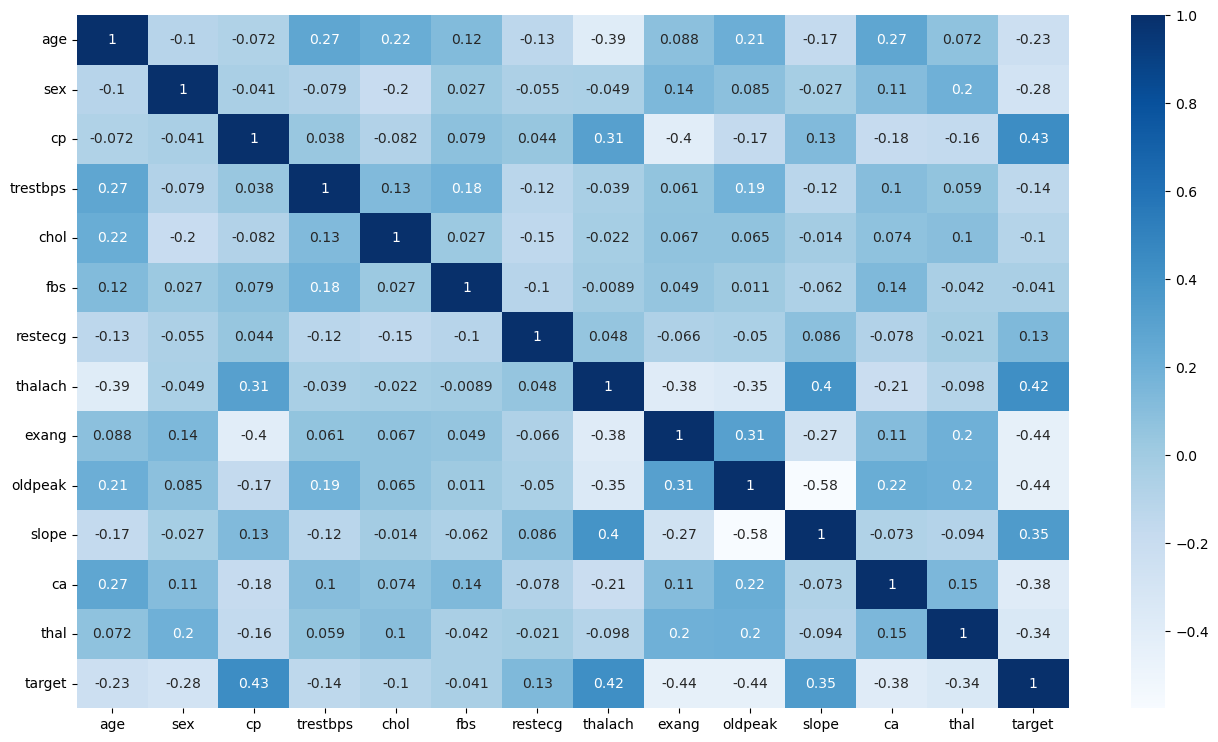

In [25]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True,cmap='Blues')
plt.show()

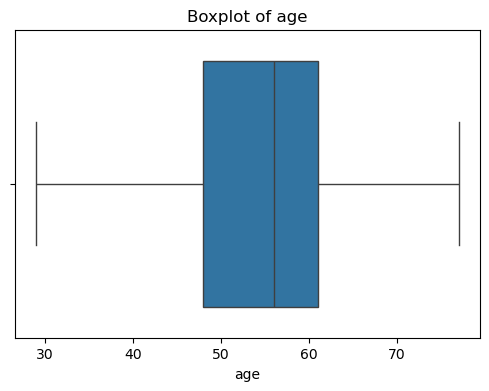

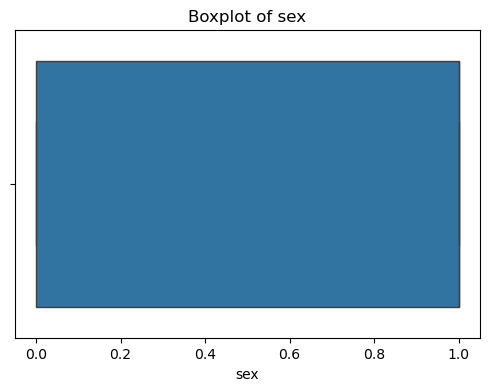

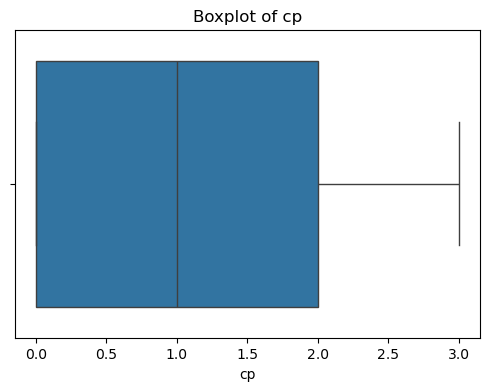

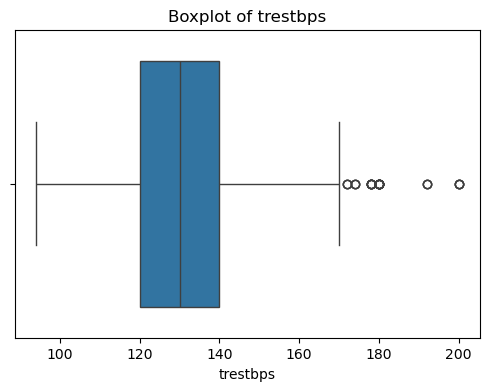

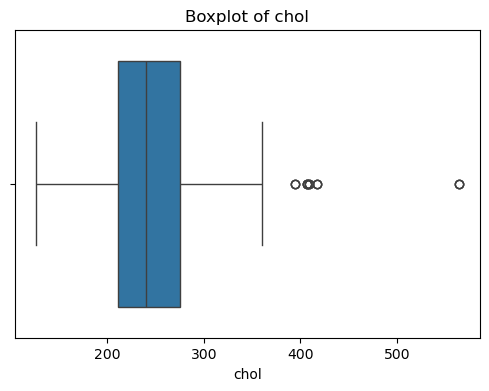

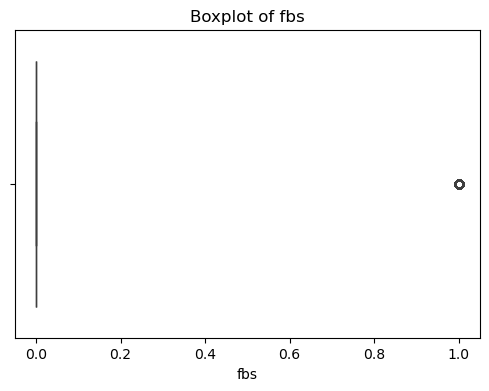

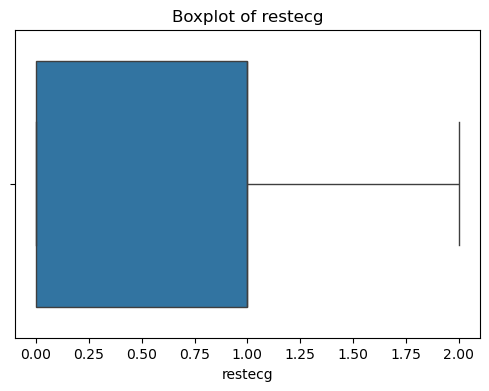

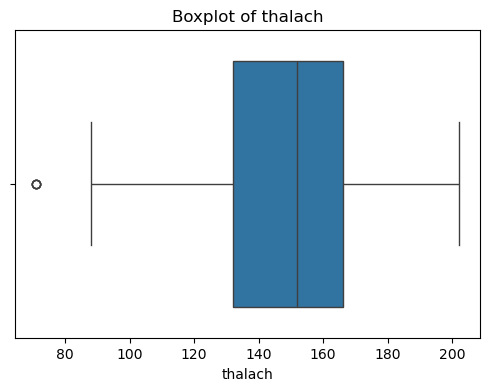

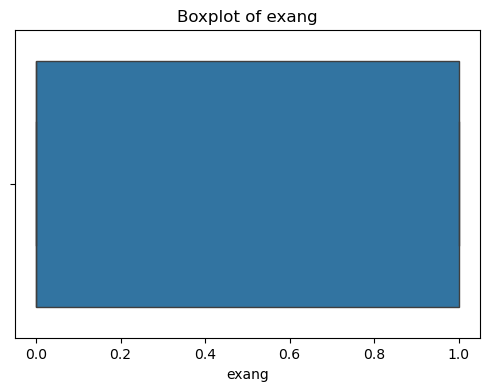

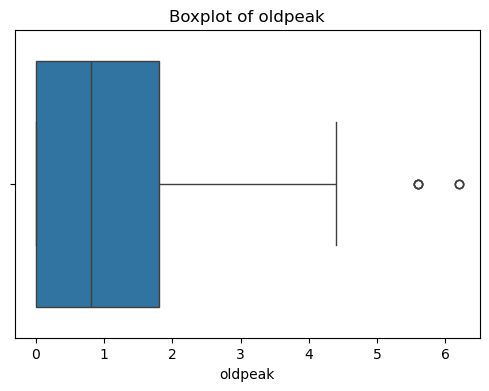

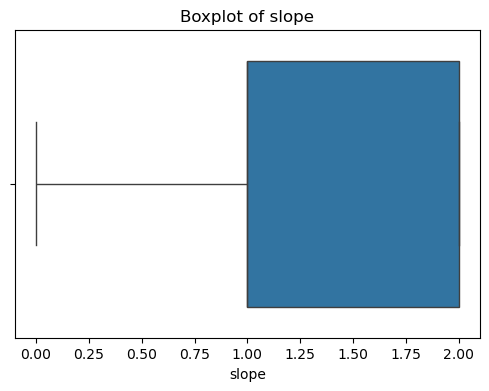

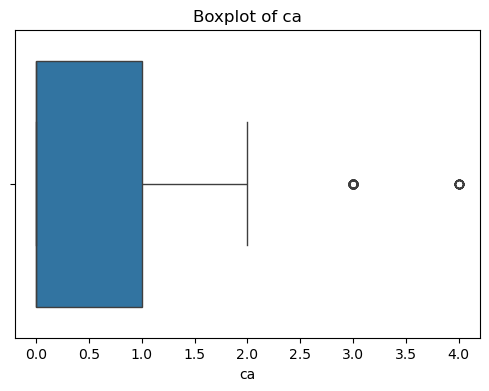

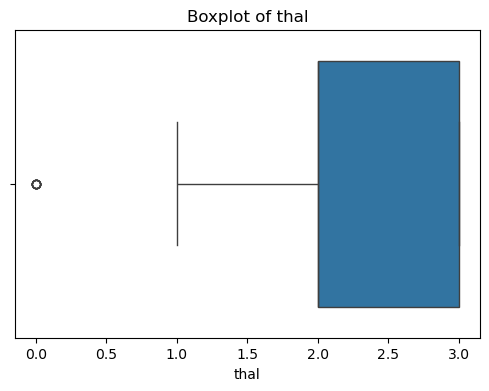

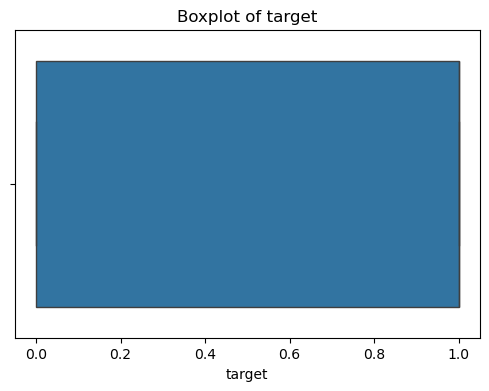

In [26]:
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [100]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

In [101]:
X = df.drop("target", axis=1)
y = df["target"]

In [102]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [103]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train.to_numpy()).float().to(device)
x_test_tensor = torch.from_numpy(x_test).float().to(device)
y_test_tensor = torch.from_numpy(y_test.to_numpy()).float().to(device)

In [105]:
class HeartDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor
        def __getitem__(self, index):
            return self.x[index], self.y[index]
        def __len__(self):
            return len(self.x)

In [106]:
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [107]:
class HeartClassifier(nn.Module):
    def __init__(self, dimension):
        super(HeartClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(dimension, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16, 1),
            nn.Sigmoid())
    def forward(self, x):
        return self.model(x)

In [108]:
dimension = x_train.shape[1]
model = HeartClassifier(dimension).to(device)

In [109]:
model

HeartClassifier(
  (model): Sequential(
    (0): Linear(in_features=13, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): Tanh()
    (4): Linear(in_features=16, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [110]:
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCELoss()

In [111]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [112]:
epochs = 50
for i in range(epochs):
    epoch_loss = 0
    for xb, yb in train_loader:
        yb = yb.unsqueeze(1)
        optimizer.zero_grad()
        loss = criterion(model(xb), yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f'{i}: {epoch_loss}')

0: 11.166180416941643
1: 8.011102445423603
2: 7.5403982028365135
3: 6.471855752170086
4: 5.435516130179167
5: 4.720194227993488
6: 4.227990735322237
7: 3.2633194997906685
8: 3.173035968095064
9: 2.4580317474901676
10: 2.0063877678476274
11: 1.6445051301270723
12: 1.2976483725942671
13: 1.2271108068525791
14: 0.9572625029832125
15: 0.9144964120350778
16: 0.8267673142254353
17: 0.755512619856745
18: 1.0015575031284243
19: 1.1408135334495455
20: 0.7392789816949517
21: 0.9245322896167636
22: 0.9981742382515222
23: 1.0338425075169653
24: 1.0980128140654415
25: 0.830468425177969
26: 0.3937262814724818
27: 0.37333214562386274
28: 0.3819455426419154
29: 0.3043173806509003
30: 0.16009197433595546
31: 0.1322440400836058
32: 0.11318356805713847
33: 0.09343062466359697
34: 0.08636168914381415
35: 0.07813240840914659
36: 0.06929396884515882
37: 0.06370245266589336
38: 0.05920411855913699
39: 0.05466194332984742
40: 0.048502721067052335
41: 0.04645651823375374
42: 0.042109497720957734
43: 0.03903718

In [113]:
model.eval()
with torch.no_grad():
    pred = model(x_test_tensor)
    pred = (pred > 0.5)
    true = y_test_tensor

In [114]:
accuracy = accuracy_score(y_test, pred)
accuracy

0.9853658536585366

In [115]:
precision = precision_score(y_test, pred)
precision

1.0

In [116]:
recall = recall_score(y_test, pred)
recall

0.970873786407767

In [117]:
f1 = f1_score(y_test, pred)
f1

0.9852216748768473